In [ ]:
# Time Series Forcasting with Prophet
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings("ignore")

plt.style.use('ggplot')
plt.style.use('fivethirtyeight')

def mean_absolute_percentage_error(y_true, y_pred): 
    """Calculates MAPE given y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


In [ ]:
MedianHouseholdIncome = pd.read_csv('MedianHouseholdIncome.csv',
                   index_col=[0],
                  parse_dates=[0])
MedianHouseholdIncome.head()

In [ ]:
color_pal = sns.color_palette()
MedianHouseholdIncome.plot(style='.',
          figsize=(10, 5),
          ms=10,
          color=color_pal[0],
          title='Median Household Income')
plt.show()

In [ ]:
from pandas.api.types import CategoricalDtype

cat_type = CategoricalDtype(categories=['Monday','Tuesday',
                                        'Wednesday',
                                        'Thursday','Friday',
                                        'Saturday','Sunday'],
                            ordered=True)

def create_features(df, label=None):
    """
    Creates time series features from datetime index.
    """
    df = df.copy()
    df['date'] = df.index
    df['hour'] = df['date'].dt.hour
    df['dayofweek'] = df['date'].dt.dayofweek
    df['weekday'] = df['date'].dt.day_name()
    df['weekday'] = df['weekday'].astype(cat_type)
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.isocalendar().week
    df['date_offset'] = (df.date.dt.month*100 + df.date.dt.day - 320)%1300

    df['season'] = pd.cut(df['date_offset'], [0, 300, 602, 900, 1300], 
                          labels=['Spring', 'Summer', 'Fall', 'Winter']
                   )
    X = df[['hour','dayofweek','quarter','month','year',
           'dayofyear','dayofmonth','weekofyear','weekday',
           'season']]
    if label:
        y = df[label]
        return X, y
    return X

X, y = create_features(MedianHouseholdIncome, label='MEHOINUSNYA672N')
features_and_target = pd.concat([X, y], axis=1)

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(data=features_and_target.dropna(),
            x='weekday',
            y='MEHOINUSNYA672N',
            hue='season',
            ax=ax,
            linewidth=1)
ax.set_title('Median Household Income by Day of Week')
ax.set_xlabel('Day of Week')
ax.set_ylabel('Median Household Income')
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

In [ ]:
# Median Household Income NY analysis
df_income = pd.read_csv(".csv")
df_income["observation_date"] = pd.to_datetime(df_income["observation_date"])
df_income = df_income.rename(columns={"observation_date": "ds", "MEHOINUSNYA672N": "y"})
m_income = Prophet(yearly_seasonality=True, interval_width=0.95)
m_income.fit(df_income)
future_income = m_income.make_future_dataframe(periods=5, freq="YE")
forecast_income = m_income.predict(future_income)
fig_income = m_income.plot(forecast_income)
plt.title("Prophet Forecast of Median Household Income in NY")
plt.ylabel("Median Income")
plt.show()

In [ ]:
NYCMultifamily = pd.read_excel('NYCMultifamily.xlsx',
                   index_col=[0],
                  parse_dates=[0])
NYCMultifamily.head()



14:59:23 - cmdstanpy - INFO - Chain [1] start processing
14:59:23 - cmdstanpy - INFO - Chain [1] done processing
14:59:23 - cmdstanpy - INFO - Chain [1] done processing


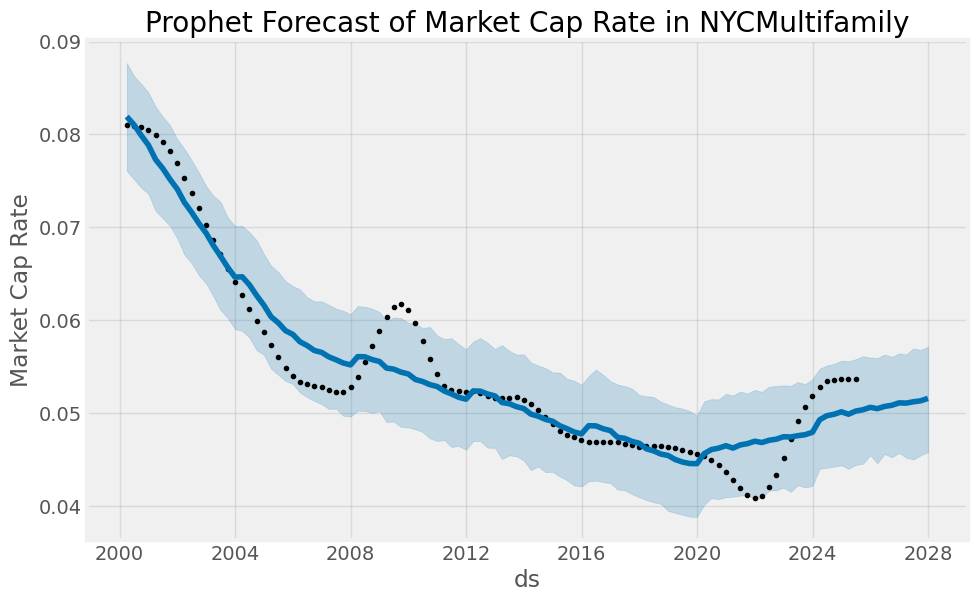

In [26]:
# Prophet forecast using NYCMultifamily dataframe
# Convert 'Quarter' like '2025 Q4' to a datetime (quarter end)
def quarter_to_date(q):
    q = str(q).strip()
    parts = q.split()
    if len(parts) == 2 and parts[1].startswith('Q'):
        year = parts[0]
        quarter_num = int(parts[1][1])
        month = quarter_num * 3
        return pd.Timestamp(f"{year}-{month}-01") + pd.offsets.MonthEnd(0)
    else:
        return pd.NaT  # Not a valid quarter string

NYCMultifamily = NYCMultifamily.copy()
NYCMultifamily['ds'] = NYCMultifamily.index.to_series().apply(quarter_to_date)
NYCMultifamily = NYCMultifamily.rename(columns={"Market Cap Rate": "y"})

df_prophet = NYCMultifamily.reset_index(drop=True)[['ds', 'y']]
# Drop rows where ds or y is NaN
df_prophet = df_prophet.dropna(subset=['ds', 'y'])

m_income = Prophet(yearly_seasonality=True, interval_width=0.95)
m_income.fit(df_prophet)
future_income = m_income.make_future_dataframe(periods=10, freq="Q")
forecast_income = m_income.predict(future_income)
fig_income = m_income.plot(forecast_income)
plt.title("Prophet Forecast of Market Cap Rate in NYCMultifamily")
plt.ylabel("Market Cap Rate")
plt.show()

15:02:02 - cmdstanpy - INFO - Chain [1] start processing
15:02:02 - cmdstanpy - INFO - Chain [1] done processing
15:02:02 - cmdstanpy - INFO - Chain [1] done processing


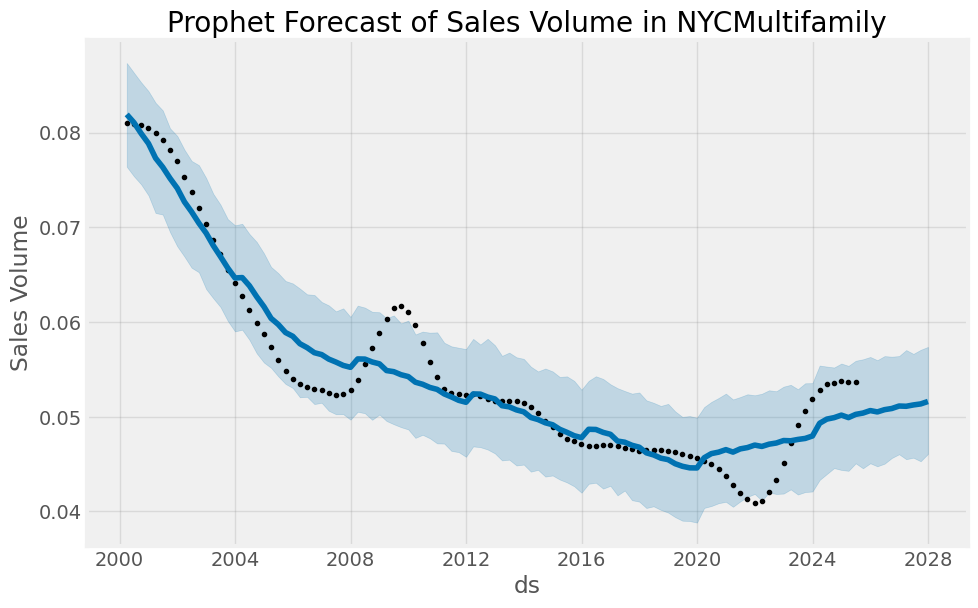

In [28]:
# Prophet forecast using NYCMultifamily dataframe - Forcast Sales Volume
# Convert 'Quarter' like '2025 Q4' to a datetime (quarter end)
def quarter_to_date(q):
    q = str(q).strip()
    parts = q.split()
    if len(parts) == 2 and parts[1].startswith('Q'):
        year = parts[0]
        quarter_num = int(parts[1][1])
        month = quarter_num * 3
        return pd.Timestamp(f"{year}-{month}-01") + pd.offsets.MonthEnd(0)
    else:
        return pd.NaT  # Not a valid quarter string 

NYCMultifamily = NYCMultifamily.copy()
NYCMultifamily['ds'] = NYCMultifamily.index.to_series().apply(quarter_to_date)
NYCMultifamily = NYCMultifamily.rename(columns={"Sales Volume": "y"})
df_prophet = NYCMultifamily.reset_index(drop=True)[['ds', 'y']]
# Drop rows where ds or y is NaN
df_prophet = df_prophet.dropna(subset=['ds', 'y'])
m_income = Prophet(yearly_seasonality=True, interval_width=0.95)
m_income.fit(df_prophet)
future_income = m_income.make_future_dataframe(periods=10, freq="Q")
forecast_income = m_income.predict(future_income)
fig_income = m_income.plot(forecast_income)
plt.title("Prophet Forecast of Sales Volume in NYCMultifamily")
plt.ylabel("Sales Volume")
plt.show()